In [9]:
pip install google-play-scraper pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
from datetime import datetime, date, time, timedelta

In [2]:
from google_play_scraper import Sort, reviews
import pandas as pd

result, _ = reviews(
    'com.jiobp.myjio_bp',  # Replace with real app ID
    lang='en',
    country='IN',
    sort=Sort.NEWEST,
    count=20000
)

df = pd.DataFrame(result)
df[['userName', 'score', 'at', 'content']].to_csv('playstore_reviews.csv', index=False)

In [3]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,df074a21-50a3-42c9-babc-c9d8037233d0,Praveen Patil,https://play-lh.googleusercontent.com/a-/ALV-U...,otp not getting,1,0,1.9.9,2025-05-17 16:22:37,None,None,1.9.9
1,fe696b4d-7a1f-444f-80d5-efe6f04353f8,Bharath Dhanaraj,https://play-lh.googleusercontent.com/a-/ALV-U...,unable to signin getting stuck in dob,1,0,1.9.7,2025-04-28 19:15:44,None,None,1.9.7
2,13701a27-f607-403a-9552-5afc400b45bb,Firoz Shaikh,https://play-lh.googleusercontent.com/a/ACg8oc...,app not working,1,0,1.9.7,2025-04-26 15:21:02,None,None,1.9.7
3,d6dbfe0e-a6bc-429d-9374-9f3f048d46cf,Vijay GV,https://play-lh.googleusercontent.com/a-/ALV-U...,worst app. not able to add dates.,1,0,None,2025-04-24 22:52:54,None,None,None
4,ad5463f1-dcf5-4c57-b9ea-b225f0e4b04d,U P,https://play-lh.googleusercontent.com/a-/ALV-U...,useless app. cannot find anything just shows b...,1,0,1.9.7,2025-04-24 11:26:22,None,None,1.9.7


In [4]:
df=df.drop("reviewId",axis=1)

In [5]:
df=df.drop("userName",axis=1)
df=df.drop("userImage",axis=1)
df=df.drop("replyContent",axis=1)
df=df.drop("repliedAt",axis=1)

In [6]:
df

,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,otp not getting,1,0,1.9.9,2025-05-17 16:22:37,1.9.9
1,unable to signin getting stuck in dob,1,0,1.9.7,2025-04-28 19:15:44,1.9.7
2,app not working,1,0,1.9.7,2025-04-26 15:21:02,1.9.7
3,worst app. not able to add dates.,1,0,None,2025-04-24 22:52:54,None
4,useless app. cannot find anything just shows b...,1,0,1.9.7,2025-04-24 11:26:22,1.9.7
...,...,...,...,...,...,...
67,Making people fool,1,1,1.4,2023-09-27 10:20:38,1.4
68,"There are not transaction history in profile,w...",1,4,1.4,2023-09-21 08:54:02,1.4
69,Bangalore area not working fine station,3,0,1.4,2023-07-18 03:53:42,1.4
70,I think this app need to be more development a...,3,10,1.3,2022-12-20 21:49:45,1.3


In [7]:
df.to_csv('playstore_reviews.csv', index=False)

In [8]:
df.to_csv('C:/Users/Prateek Kumar/Downloads/output.csv', index=False)

#Sentiment Analysis

In [30]:
! pip install pandas textblob nltk matplotlib

In [1]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\Prateek
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Prateek Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re

In [3]:
# Download stopwords list
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Prateek
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv('My Jio-Bp Reviews.csv')

In [5]:
df

,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,otp not getting,1,0,1.9.9,2025-05-17 16:22:37,1.9.9
1,unable to signin getting stuck in dob,1,0,1.9.7,2025-04-28 19:15:44,1.9.7
2,app not working,1,0,1.9.7,2025-04-26 15:21:02,1.9.7
3,worst app. not able to add dates.,1,0,NaN,2025-04-24 22:52:54,NaN
4,useless app. cannot find anything just shows b...,1,0,1.9.7,2025-04-24 11:26:22,1.9.7
...,...,...,...,...,...,...
67,Making people fool,1,1,1.4,2023-09-27 10:20:38,1.4
68,"There are not transaction history in profile,w...",1,4,1.4,2023-09-21 08:54:02,1.4
69,Bangalore area not working fine station,3,0,1.4,2023-07-18 03:53:42,1.4
70,I think this app need to be more development a...,3,10,1.3,2022-12-20 21:49:45,1.3


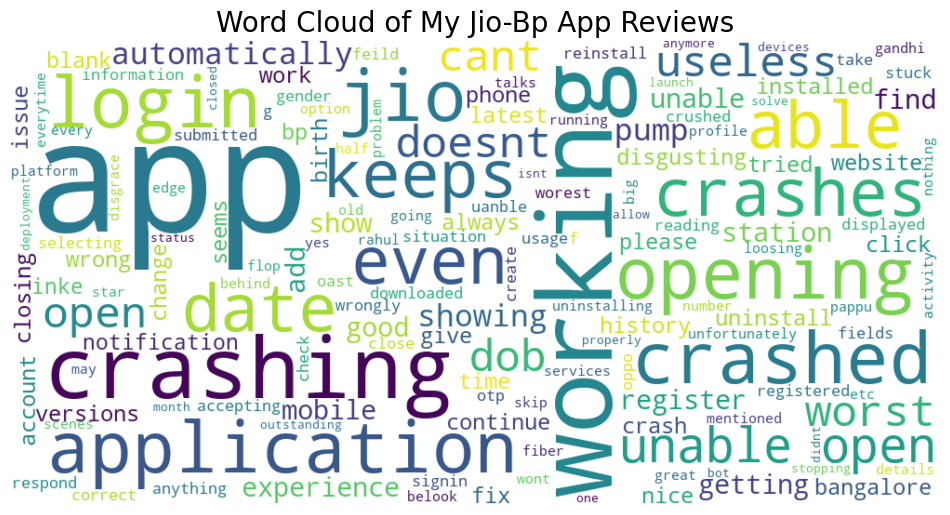

In [6]:
def clean_text(df):
    # Remove special characters and numbers
    df = re.sub(r"[^a-zA-Z\s]", "", df)
    # Convert to lowercase and split into words
    words = df.lower().split()
    # Remove stopwords
    cleaned_words = [word for word in words if word not in stop_words]
    return " ".join(cleaned_words)

df['cleaned_review'] = df['content'].astype(str).apply(clean_text)

full_text = " ".join(df['cleaned_review'])
#cleaned_text = clean_text(df)
#print(cleaned_text)


wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='viridis',
    max_words=150,
    contour_color='coolwarm',
    contour_width=3
).generate(full_text)
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of My Jio-Bp App Reviews", fontsize=20)
plt.show()


In [7]:
plt.savefig("C:/Users/Prateek Kumar/Downloads/output.png", dpi=300)

<Figure size 640x480 with 0 Axes>

In [8]:
df = df.dropna(subset=['content'])

In [9]:
df

,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,cleaned_review
0,otp not getting,1,0,1.9.9,2025-05-17 16:22:37,1.9.9,otp getting
1,unable to signin getting stuck in dob,1,0,1.9.7,2025-04-28 19:15:44,1.9.7,unable signin getting stuck dob
2,app not working,1,0,1.9.7,2025-04-26 15:21:02,1.9.7,app working
3,worst app. not able to add dates.,1,0,NaN,2025-04-24 22:52:54,NaN,worst app able add dates
4,useless app. cannot find anything just shows b...,1,0,1.9.7,2025-04-24 11:26:22,1.9.7,useless app cannot find anything shows blank
...,...,...,...,...,...,...,...
67,Making people fool,1,1,1.4,2023-09-27 10:20:38,1.4,making people fool
68,"There are not transaction history in profile,w...",1,4,1.4,2023-09-21 08:54:02,1.4,transaction history profileworst appnot recomm...
69,Bangalore area not working fine station,3,0,1.4,2023-07-18 03:53:42,1.4,bangalore area working fine station
70,I think this app need to be more development a...,3,10,1.3,2022-12-20 21:49:45,1.3,think app need development done bugs like noti...


In [10]:
# Function to calculate polarity
def get_sentiment(df):
    blob = TextBlob(df)
    return blob.sentiment.polarity

In [11]:
# Apply sentiment analysis
df['Polarity'] = df['content'].apply(get_sentiment)

In [12]:
df['Polarity']

0     0.000000
1    -0.500000
2     0.000000
3    -0.625000
4    -0.250000
        ...   
67    0.000000
68    0.000000
69    0.416667
70    0.231000
71    0.000000
Name: Polarity, Length: 72, dtype: float64

In [13]:
# Classify sentiment
def classify_sentiment(score):
    if score > 0.2:
        return 'Positive'
    elif score < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Polarity'].apply(classify_sentiment)

In [14]:
# Show sample results
print(df[['content', 'Polarity', 'Sentiment']])


                                              content  Polarity Sentiment
0                                     otp not getting  0.000000   Neutral
1               unable to signin getting stuck in dob -0.500000  Negative
2                                     app not working  0.000000   Neutral
3                   worst app. not able to add dates. -0.625000  Negative
4   useless app. cannot find anything just shows b... -0.250000  Negative
..                                                ...       ...       ...
67                                 Making people fool  0.000000   Neutral
68  There are not transaction history in profile,w...  0.000000   Neutral
69            Bangalore area not working fine station  0.416667  Positive
70  I think this app need to be more development a...  0.231000  Positive
71  Inke pump inke pump per Maine gadi park ki thi...  0.000000   Neutral

[72 rows x 3 columns]


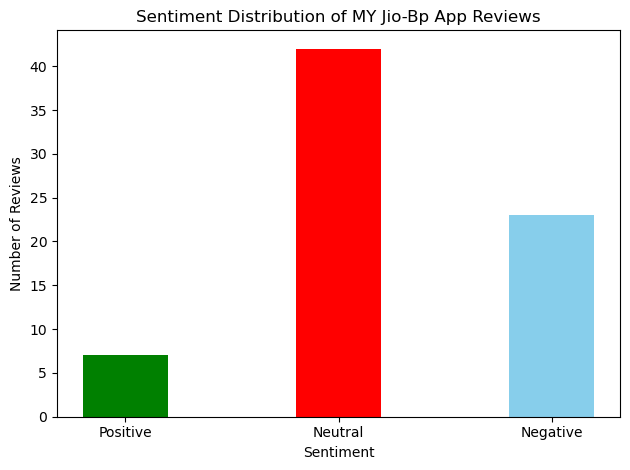

In [24]:
# Optional: Plot sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
sentiment_dict = sentiment_counts.to_dict()
custom_order = ['Positive', 'Neutral', 'Negative']
ordered_counts = [sentiment_dict.get(sentiment, 0) for sentiment in custom_order]
plt.bar(custom_order, ordered_counts, color=['green','red', 'skyblue'],width=0.4)
#sentiment_counts.plot(custom_order,kind='bar', color=['green', 'red', 'skyblue'])
plt.title('Sentiment Distribution of MY Jio-Bp App Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
